## «Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок»

# Задания для самостоятельного решения


In [16]:
import numpy as np
import pandas as pd
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
</div>

In [17]:
Delta = 3
Confidence = 0.95
Var = 225
Std = Var**(1/2) # Стандартное отклонение
Z95 = 1.96 # Квантиль нормального распределения 95% уровня 1-а = 1 - (0.05/2) = 0.975
n = (Z95*Std/Delta)**2
print(f'Минимально необходимый объем выборки: {n:.2f}')

Минимально необходимый объем выборки: 96.04


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 12$.
</div>

In [18]:
Confidence = 0.98
Std = 12
x_mean = 130
n = 25
Z = 2.326 # Квантиль нормального распределения 98% уровня 1-а = 1 - (0.02/2) = 0.99
Delta = (Std*Z)/(n**(1/2))
print(f'Доверительный интервал: {x_mean - Delta}, {x_mean},  {x_mean + Delta}')

Доверительный интервал: 124.4176, 130,  135.5824


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьюдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [25]:
import scipy.stats as stats
np.random.seed(21)

population_men  = stats.norm.rvs(loc=171, scale=19, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000)  # Выборка женщин со средним ростом 165
stats.ttest_ind(population_men, population_women, equal_var = True)
#H0 - нулевая гипотеза об отсутствии различий между выборками


Ttest_indResult(statistic=33.86739608258035, pvalue=2.0738425380400884e-251)

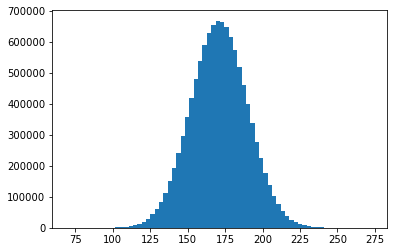

In [21]:
plt.hist(population_men, bins=70);

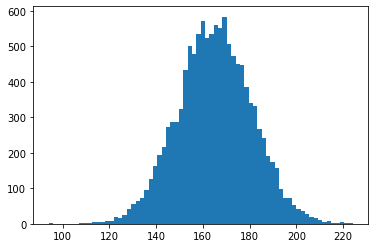

In [22]:
plt.hist(population_women, bins=70);

#### pvalue = 0.26 > a = 0.001, следовательно нулевая гипотеза не отклоняется. Различия между выборками незначительны. Разница между выборками может носить случайный характер.

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [67]:
Z95 = 1.96 #95% # Квантиль нормального распределения
Std = 150
Delta = 50
n = (Z95*Std/Delta)**2
print(f'Минимально необходимый объем выборки: {n:.2f}')

Минимально необходимый объем выборки: 34.57


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [76]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [78]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.
# H0 - Волшебник умеет предсказывать погоду
# Ha - Волшебник не умеет предсказывать погоду
oddsratio, pvalue


(0.5811965811965812, 0.35417955365927367)

#### pvalue = 0.35 > a = 0.05. Мы не можем отклонить нулевую гипотезу, что волшебник умеет предсказывать погоду.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [85]:
#Вспомогательная функция для подсчета доверительного интервала

def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

print(mean_confidence_interval(data, 0.90))


(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [27]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

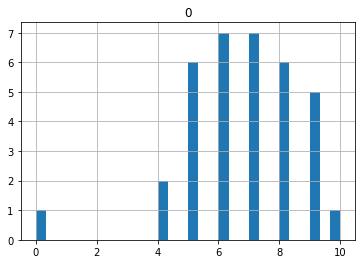

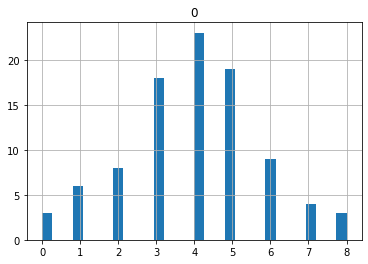

In [32]:
pd.DataFrame(data_1).hist(bins=30)
pd.DataFrame(data_2).hist(bins=30)

In [34]:
s, p = stats.ttest_ind(data_1, data_2)
p

2.1159475572725764e-11

# p-value < a = 0,05. Нулевая гипотеза о принадлежности выборок одному множеству отклоняется

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

#### Отклоняем нулевую гипотезу. Можем проверить на нормальность с помощью критерия Андерсона-Диксона(например).

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [36]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

weight_df=pd.DataFrame({"weight_before":A,
                         "weight_after":B,
                         "weight_change":A-B})
weight_df.describe()

,weight_before,weight_after,weight_change
count,300.000000,300.000000,300.000000
mean,9.988743,2.402565,7.586178
std,48.382837,50.194664,10.080429
min,-122.665928,-132.706709,-16.708613
25%,-23.848281,-32.264095,1.442311
50%,9.084926,2.061319,7.560908
75%,43.165156,40.026959,13.559219
max,120.092816,118.081766,42.102828


In [37]:
 stats.ttest_rel(a=A,b=B)

Ttest_relResult(statistic=13.034807913386183, pvalue=4.646900674640473e-31)

In [ ]:
a Имеется значимое различие между препаратами
b p-value < 0.05

(array([ 3., 11., 24., 37., 49., 65., 40., 35., 30.,  6.]),
 array([-132.70670939, -107.62786186,  -82.54901434,  -57.47016682,
         -32.3913193 ,   -7.31247177,   17.76637575,   42.84522327,
          67.92407079,   93.00291831,  118.08176584]),
 <BarContainer object of 10 artists>)

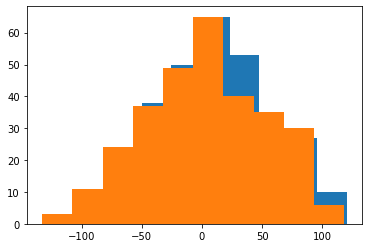

In [42]:
plt.hist(A)
plt.hist(B)